In [1]:
import os
from io import StringIO
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

# data1 = [23,85, 72, 43, 52]
# data2 = [42, 35, 21, 16, 9]
# plt.bar(range(len(data1)), data1)
# plt.bar(range(len(data2)), data2, bottom=data1)

In [2]:
def average(lst): 
    return sum(lst) / len(lst)

In [4]:
bw_list = ["10M", "100M", "500M", "1000M"]

comm_time_dict = {}
deserial_time_dict = {}
get_time_dict = {}

for bw in bw_list:
    trace_dir = "/home/posheng/billy_ws/fl_025/paslab/trace/get_model_analysis/node_num_5000000/"
    coord_trace_file = "coord_" + bw + ".txt"
    trace_filepath = os.path.join(trace_dir, coord_trace_file)
    
    with open(trace_filepath,"r") as rf:
        new_trace = StringIO()
        line = rf.readline()
        while line:
            line_list = line.split()
            if line_list[0] == "[trace]" or line_list[0] == "[PROF]":
                new_trace.write(line)
            line = rf.readline()

    new_trace.seek(0)
    df = pd.read_csv(new_trace, sep=" ", names=["InfoType", "EventType", "EventState", "ID", "Time"])
    del df["InfoType"]
    
    get_time_index = list(df[df["EventType"] == "GetTime"].index)
    
    comm_time_list = []
    deserial_time_list = []
    get_time_list = []
    for idx in get_time_index[1:]:
        comm_time_list.append(df.loc[idx-2]["Time"])
        deserial_time_list.append(df.loc[idx-1]["Time"])
        get_time_list.append(df.loc[idx]["Time"])
        
    comm_time_dict[bw] = average(comm_time_list)
    deserial_time_dict[bw] = average(deserial_time_list)
    get_time_dict[bw] = average(get_time_list)

In [5]:
comm_time_dict

{'10M': 50.46744320392609,
 '100M': 5.282662308216095,
 '500M': 1.2482212901115417,
 '1000M': 0.763195252418518}

In [6]:
deserial_time_dict

{'10M': 0.1864861488342285,
 '100M': 0.186708664894104,
 '500M': 0.1644994616508484,
 '1000M': 0.16145471334457398}

In [7]:
get_time_dict

{'10M': 50.65451523065567,
 '100M': 5.470369708538056,
 '500M': 1.4135547757148743,
 '1000M': 0.9256592392921448}

<BarContainer object of 4 artists>

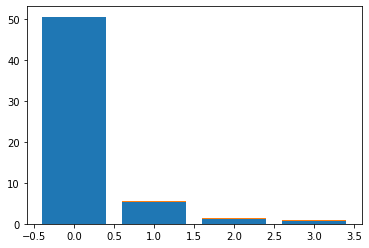

In [10]:
data1 = list(comm_time_dict.values())
data2 = list(deserial_time_dict.values())
plt.bar(range(len(data1)), data1)
plt.bar(range(len(data2)), data2, bottom=data1)

In [9]:
bw = "1000M"

trace_dir = "/home/posheng/billy_ws/fl_025/paslab/trace/get_model_analysis/node_num_5000000/"
coord_trace_file = "coord_" + bw + ".txt"
trace_filepath = os.path.join(trace_dir, coord_trace_file)

In [10]:
trace_filepath

'/home/posheng/billy_ws/fl_025/paslab/trace/get_model_analysis/node_num_5000000/coord_1000M.txt'

In [13]:
with open(trace_filepath,"r") as rf:
    new_trace = StringIO()
    line = rf.readline()
    while line:
        line_list = line.split()
        if line_list[0] == "[trace]" or line_list[0] == "[PROF]":
            new_trace.write(line)
        line = rf.readline()

new_trace.seek(0)
df = pd.read_csv(new_trace, sep=" ", names=["InfoType", "EventType", "EventState", "ID", "Time"])

In [15]:
del df["InfoType"]

In [18]:
len(df[df["EventType"] == "GetTime"])

21

In [28]:
get_time_index = list(df[df["EventType"] == "GetTime"].index)

In [43]:
comm_time = []
deserial_time = []
get_time = []
for idx in get_time_index[1:]:
    comm_time.append(df.loc[idx-2]["Time"])
    deserial_time.append(df.loc[idx-1]["Time"])
    get_time.append(df.loc[idx]["Time"])

In [48]:
average(comm_time)

0.763195252418518

In [49]:
average(deserial_time)

0.16145471334457398

In [50]:
average(get_time)

0.9256592392921448